# Todos los modelos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

# Cargar datos

In [3]:
# Es una base de datos de bloques de deparamentos en california

# Cargar los datos
data = pd.read_csv("housing.csv")

data

# median_house_value es el objetivo de predicción

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [4]:
# Vemos la cantidad y tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Eliminar valores NaN

In [5]:
# Eliminaos de la tabla las filas con alores NaN
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Des-Categorizar en columnas con 1 y 0 las categorias de la variable "ocean_proximity"

In [6]:
# Ver valores existentes
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# Eliminar la columna "ocean_proximity" y agregar columnas con valores 1 si contenian el valor de la columna o 0 si no
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(["ocean_proximity"], axis = 1)
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
0           322.0       126.0         8.3252            452600.0          0   
1          2401.0      1138.0         8.3014            358500.0          0   
2           496.0       177.0         7.2574            352100.0          0   
3           558.0       219.0         5.6431            341300.0          0   
4           565.0       259.0         3.8462            342200.0          0   
...           ...         ...            ...                 ...        ...   
20635       845.0       330.0         1.5603             78100.0          0   
20636       356.0       114.0         2.5568             77100.0          0   
20637      1007.0       433.0         1.7000             92300.0          0   
20638       741.0       349.0         1.8672             84700.0          0   
20639      1387.0       530.0         2.3886             89400.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0           0       0         1           0  
1           0       0         1           0  
2           0       0         1           0  
3           0       0         1           0  
4           0       0         1           0  
...       ...     ...       ...         ...  
20635       1       0         0           0  
20636       1       0         0           0  
20637       1       0         0           0  
20638       1       0         0           0  
20639       1       0         0           0  

[20433 rows x 14 columns]

# Crear columnas con ratios de otras

In [8]:
# Creamos una columna con el ratio de cuantas piezas hay por cada habitación
data["bedroom_ratio"] = data["total_bedrooms"] / data["total_rooms"]
# Creamos una columna con el ratio de cuantas piezas hay por cada persona que vive en la propiedad
data["household_rooms"] = data["total_rooms"] / data["households"]
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
0           322.0       126.0         8.3252            452600.0          0   
1          2401.0      1138.0         8.3014            358500.0          0   
2           496.0       177.0         7.2574            352100.0          0   
3           558.0       219.0         5.6431            341300.0          0   
4           565.0       259.0         3.8462            342200.0          0   
...           ...         ...            ...                 ...        ...   
20635       845.0       330.0         1.5603             78100.0          0   
20636       356.0       114.0         2.5568             77100.0          0   
20637      1007.0       433.0         1.7000             92300.0          0   
20638       741.0       349.0         1.8672             84700.0          0   
20639      1387.0       530.0         2.3886             89400.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  bedroom_ratio  household_rooms  
0           0       0         1           0       0.146591         6.984127  
1           0       0         1           0       0.155797         6.238137  
2           0       0         1           0       0.129516         8.288136  
3           0       0         1           0       0.184458         5.817352  
4           0       0         1           0       0.172096         6.281853  
...       ...     ...       ...         ...            ...              ...  
20635       1       0         0           0       0.224625         5.045455  
20636       1       0         0           0       0.215208         6.114035  
20637       1       0         0           0       0.215173         5.205543  
20638       1       0         0           0       0.219892         5.329513  
20639       1       0         0           0       0.221185         5.254717  

[20433 rows x 16 columns]

In [9]:
"""
la transformación logarítmica se utiliza en estas columnas específicas
para abordar valores extremos, mejorar la distribución de los datos y,
potencialmente, capturar relaciones no lineales en los modelos de regresión.

Es una técnica comúnmente utilizada para mejorar el rendimiento de los modelos
cuando los datos contienen valores sesgados o extremos.
"""
data["total_rooms"] = np.log(data["total_rooms"] + 1)
data["total_bedrooms"] = np.log(data["total_bedrooms"] + 1)
data["population"] = np.log(data["population"] + 1)
data["households"] = np.log(data["households"] + 1)

# Dividir Data

In [10]:
# Dividimos en grupos de columnas de variables independiente y dependientes
X = data.drop(["median_house_value"], axis = 1)
#X = data.drop(["median_house_value", "ocean_proximity"], axis = 1)
y = data["median_house_value"]

In [11]:
# Dividimos la data en 4 subgrupos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [12]:
# Combinamos los subgrupos de entrenamiento
train_data = X_train.join(y_train)

In [13]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4321     -118.35     34.08                52.0     6.911747        5.303305   
10870    -117.90     33.72                36.0     6.095825        4.770685   
7178     -118.18     34.05                41.0     6.424869        5.283204   
3986     -118.64     34.18                33.0     8.245122        6.436150   
9848     -121.91     36.59                17.0     8.525161        6.726233   
...          ...       ...                 ...          ...             ...   
1887     -119.98     38.92                27.0     7.894691        6.408529   
17399    -120.47     34.94                17.0     7.221836        5.733341   
12810    -121.47     38.61                35.0     7.224753        5.888878   
1807     -122.34     37.93                45.0     7.707962        6.188264   
11290    -117.93     33.78                36.0     7.682482        5.886104   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
4321     6.244167    5.323010         3.8472          1       0       0   
10870    6.359574    4.753590         3.6875          1       0       0   
7178     6.703188    5.198497         3.3333          1       0       0   
3986     7.487174    6.423247         5.1641          1       0       0   
9848     7.425954    6.566672         6.2323          0       0       0   
...           ...         ...            ...        ...     ...     ...   
1887     6.918695    5.991465         3.1500          0       1       0   
17399    6.466145    5.717028         1.8633          1       0       0   
12810    6.746412    5.796058         1.6331          0       1       0   
1807     7.173958    6.131226         2.6400          0       0       0   
11290    6.926577    5.916202         4.3906          1       0       0   

       NEAR BAY  NEAR OCEAN  bedroom_ratio  household_rooms  \
4321          0           0       0.199402         4.916667   
10870         0           0       0.264108         3.852174   
7178          0           0       0.318182         3.422222   
3986          0           0       0.163603         6.191870   
9848          0           1       0.165311         7.097183   
...         ...         ...            ...              ...   
1887          0           0       0.225951         6.721805   
17399         0           0       0.225146         4.514851   
12810         0           0       0.262391         4.182927   
1807          1           0       0.218427         4.847495   
11290         0           0       0.165514         5.862162   

       median_house_value  
4321             395700.0  
10870            137500.0  
7178             115100.0  
3986             263400.0  
9848             339100.0  
...                   ...  
1887              86900.0  
17399            109400.0  
12810             67500.0  
1807             112100.0  
11290            231300.0  

[14303 rows x 16 columns]

# Explorar Data

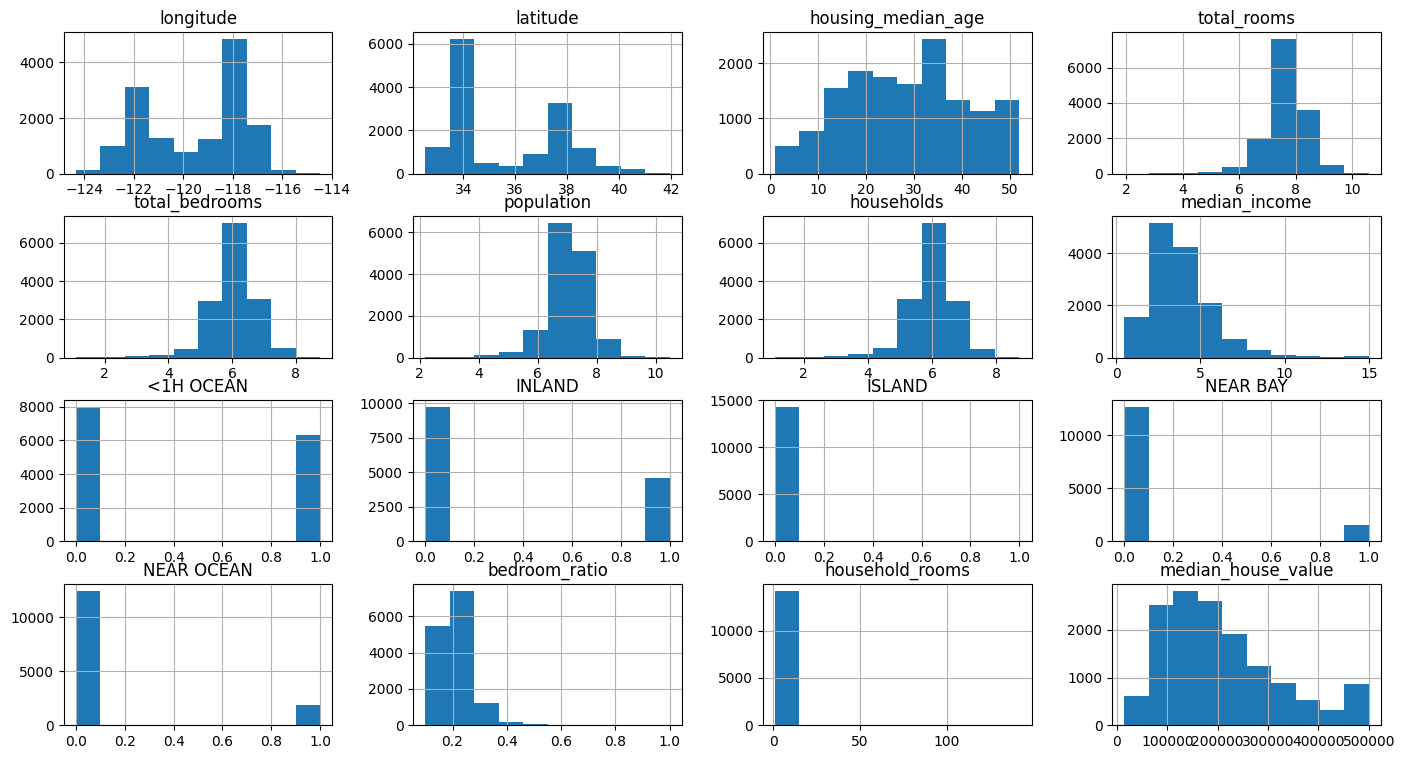

In [14]:
train_data.hist(figsize = (17, 9))
plt.show()

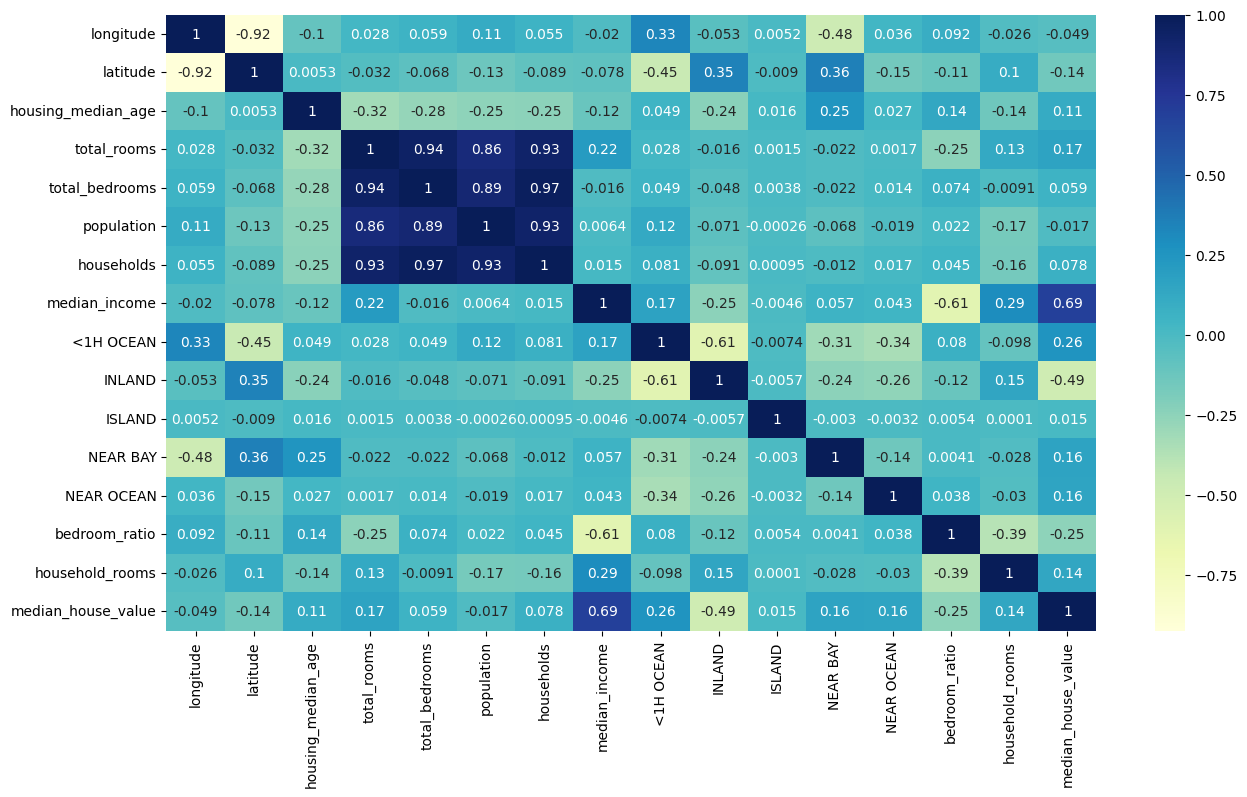

In [15]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

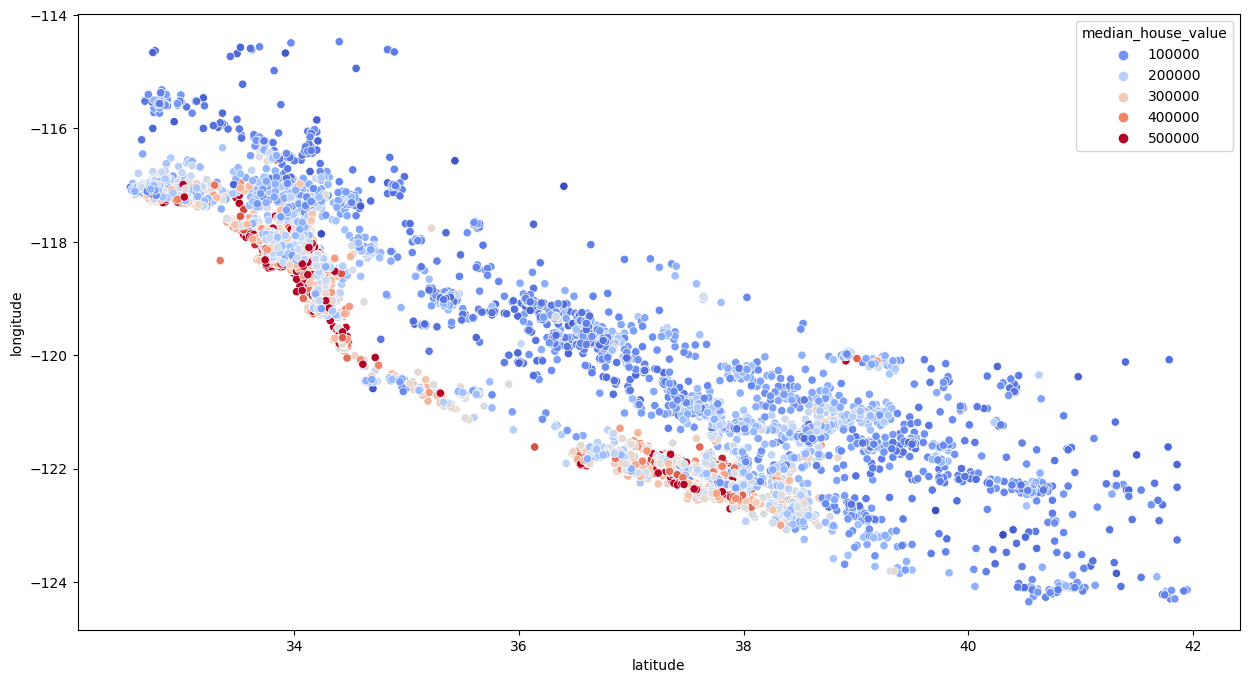

In [16]:
# Graficación de las propiedades con color segun su precio (Las más caras son las de la costa)
plt.figure(figsize = (15, 8))
sns.scatterplot(x = "latitude" , y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")
plt.show()

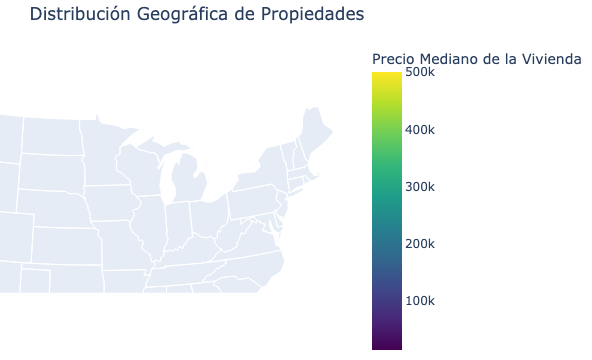

In [17]:
import plotly.graph_objects as go
# Graficar para ver si la cercania a la costa es importante para predecir
fig = go.Figure(data=go.Scattergeo(
    lat = train_data['latitude'],
    lon = train_data['longitude'],
    mode = 'markers',
    marker = dict(
        size = 8,
        color = train_data['median_house_value'],
        colorscale = 'Viridis_r',
        reversescale = True,
        colorbar_title = 'Precio Mediano de la Vivienda'
    )
))
fig.update_layout(
    title = 'Distribución Geográfica de Propiedades',
    geo_scope='usa',
    margin=dict(l=0, r=0, t=40, b=0),  # Ajustar los márgenes
)
fig.show()


In [18]:
"""
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

models = [
    DecisionTreeRegressor(),
    ElasticNet(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    Lasso(),
    LinearRegression(),
    RandomForestRegressor(),
    Ridge(),
]

model_names = [
    "Decision Tree Regression",
    "ElasticNet",
    "Gradient Boosting",
    "KNN Regression",
    "Lasso",
    "Linear Regression",
    "Random Forest",
    "Ridge",
]

mse_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Crear dataframe con los nombres de los modelos y los MSE scores
data = pd.DataFrame({'Modelo': model_names, 'MSE': mse_scores})

# Graficar los MSE scores de cada modelo con seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='MSE', data=data)
plt.xlabel("Modelo")
plt.ylabel("MSE")
plt.title("MSE Scores de los modelos")
plt.ylim(bottom=0)  # Ajustar el rango del eje y para que comience en 0
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar los valores correspondientes en las barras
for index, row in data.iterrows():
    plt.text(index, row['MSE'], round(row['MSE'], 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()
"""

'\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor\nfrom sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.svm import SVR\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.model_selection import cross_val_score\n\nmodels = [\n    DecisionTreeRegressor(),\n    ElasticNet(),\n    GradientBoostingRegressor(),\n    KNeighborsRegressor(),\n    Lasso(),\n    LinearRegression(),\n    RandomForestRegressor(),\n    Ridge(),\n    SVR()\n]\n\nmodel_names = [\n    "Decision Tree Regression",\n    "ElasticNet",\n    "Gradient Boosting",\n    "KNN Regression",\n    "Lasso",\n    "Linear Regression",\n    "Random Forest",\n    "Ridge",\n    "Support Vector Regressor"\n]\n\nmse_scores = []\n\nfor model in models:\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    mse = mean_squared_error(y_test, y_pred)\n 

In [19]:
"""
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

models = [
    DecisionTreeRegressor(),
    ElasticNet(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    Lasso(),
    LinearRegression(),
    RandomForestRegressor(),
    Ridge(),
]

model_names = [
    "Decision Tree Regression",
    "ElasticNet",
    "Gradient Boosting",
    "KNN Regression",
    "Lasso",
    "Linear Regression",
    "Random Forest",
    "Ridge",
]

mse_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Crear dataframe con los nombres de los modelos y los MSE scores
data = pd.DataFrame({'Modelo': model_names, 'MSE': mse_scores})

# Graficar los MSE scores de cada modelo con seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='MSE', data=data)
plt.xlabel("Modelo")
plt.ylabel("MSE")
plt.title("MSE Scores de los modelos")
plt.ylim(bottom=0)  # Ajustar el rango del eje y para que comience en 0
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar los valores correspondientes en las barras en formato de número elevado a 10
for index, row in data.iterrows():
    plt.text(index, row['MSE'], f"{row['MSE']:.2e}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
"""

'\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor\nfrom sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.svm import SVR\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.model_selection import cross_val_score\n\nmodels = [\n    DecisionTreeRegressor(),\n    ElasticNet(),\n    GradientBoostingRegressor(),\n    KNeighborsRegressor(),\n    Lasso(),\n    LinearRegression(),\n    RandomForestRegressor(),\n    Ridge(),\n    SVR()\n]\n\nmodel_names = [\n    "Decision Tree Regression",\n    "ElasticNet",\n    "Gradient Boosting",\n    "KNN Regression",\n    "Lasso",\n    "Linear Regression",\n    "Random Forest",\n    "Ridge",\n    "Support Vector Regressor"\n]\n\nmse_scores = []\n\nfor model in models:\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    mse = mean_squared_error(y_test, y_pred)\n 

/Users/estebanbarrios/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.236e+12, tolerance: 1.910e+10



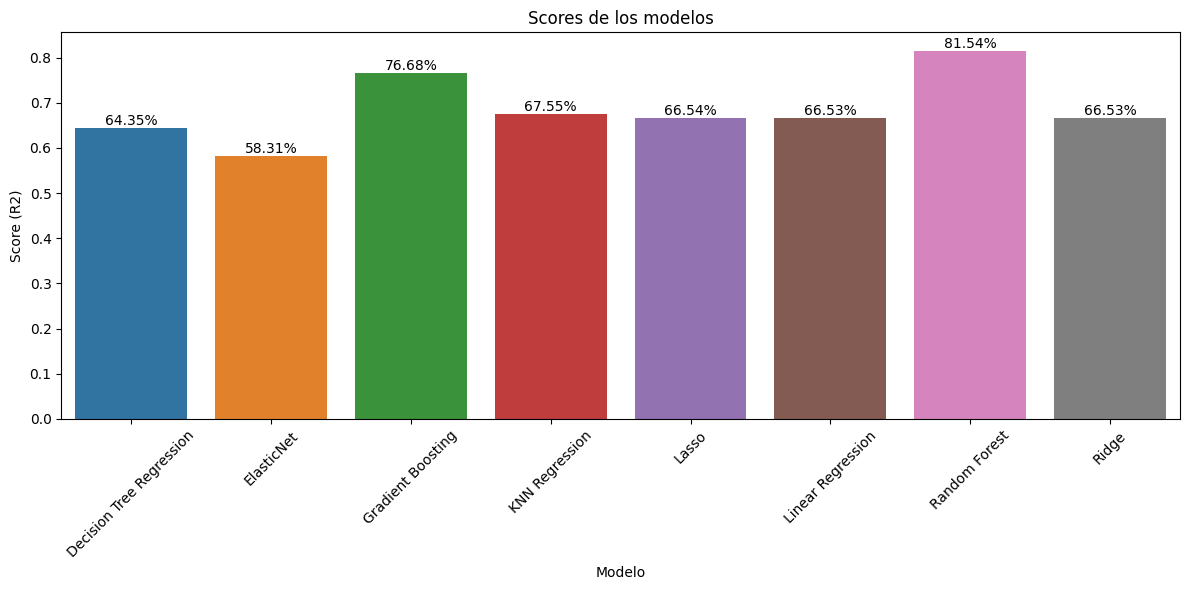

In [20]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

models = [
    DecisionTreeRegressor(),
    ElasticNet(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    Lasso(),
    LinearRegression(),
    RandomForestRegressor(),
    Ridge()
]

model_names = [
    "Decision Tree Regression",
    "ElasticNet",
    "Gradient Boosting",
    "KNN Regression",
    "Lasso",
    "Linear Regression",
    "Random Forest",
    "Ridge"
]

scores = []

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

# Crear dataframe con los nombres de los modelos y los scores
data = pd.DataFrame({'Modelo': model_names, 'Score': scores})

# Graficar los scores de cada modelo con seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='Score', data=data)
plt.xlabel("Modelo")
plt.ylabel("Score (R2)")
plt.title("Scores de los modelos")
#plt.ylim(0, 1)  # Ajustar limite grafico eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x

# Mostrar los valores correspondientes en las barras como porcentaje
for index, row in data.iterrows():
    score_percentage = round(row['Score'] * 100, 2)
    plt.text(index, row['Score'], f"{score_percentage}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()